# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [1]:
ls

BostonHousing.csv  images/       index.ipynb  README.md
CONTRIBUTING.md    index_files/  LICENSE.md


In [2]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
data = pd.read_csv('BostonHousing.csv')
%matplotlib inline

In [7]:
print(len(data.columns))
print(data.columns)
print(len(data))

14
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
506


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Record your observations here 
Observations: only 2 categorical variables (rad & chas)

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

In [5]:
for item in data:
    print(item)

crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
b
lstat
medv


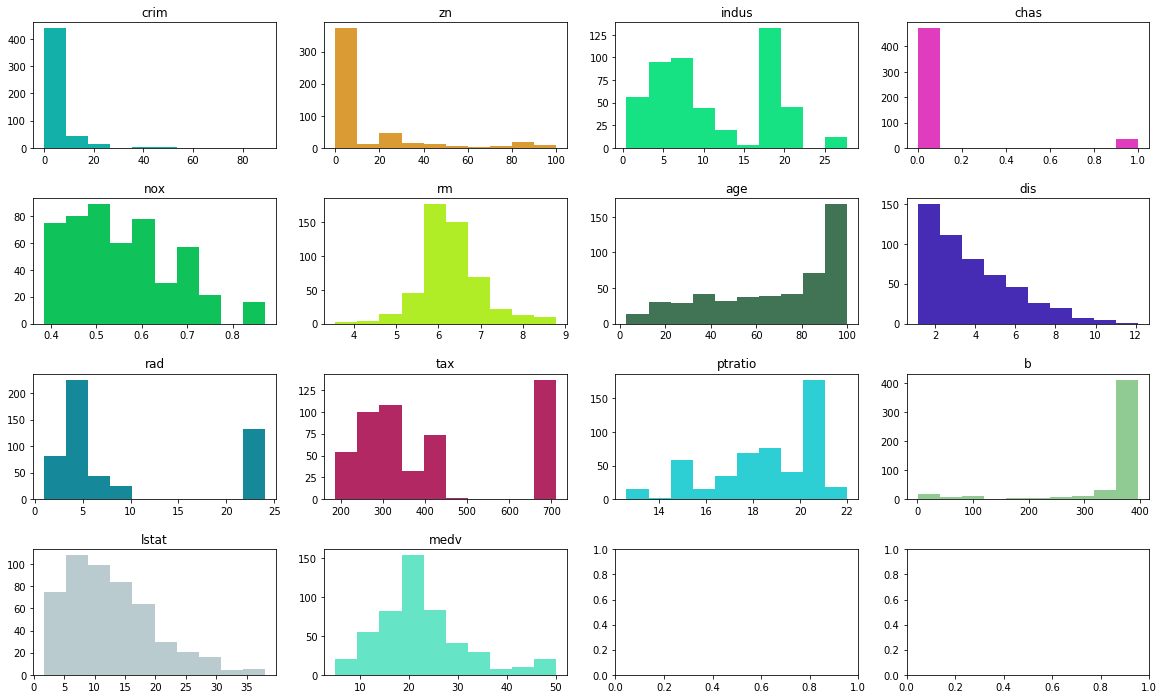

In [6]:
# Your code here
%matplotlib inline
fig, axes = plt.subplots(4,4, figsize = (20,12))
plt.subplots_adjust(hspace = 0.4)
for index, item in enumerate(data):
    row = index//4
    col = index%4
    ax = axes[row][col]
    ax.hist(data[item],  color = np.random.rand(3,), marker)
    ax.set_title(item)


In [7]:
# You observations here 


Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [8]:
# Your code here
new_df = data.loc[:,['crim','dis','rm','zn','age','medv']]
new_df.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots

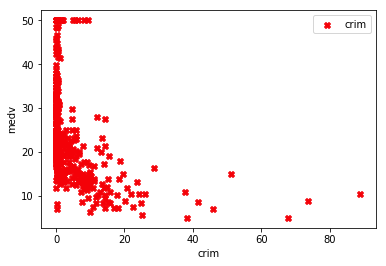

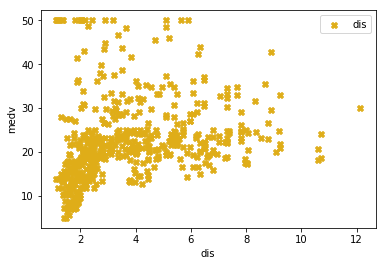

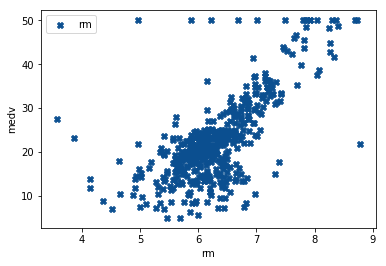

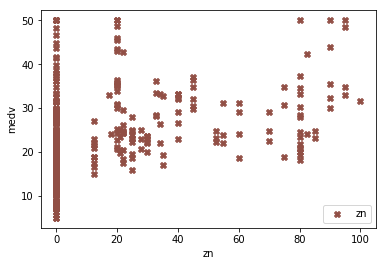

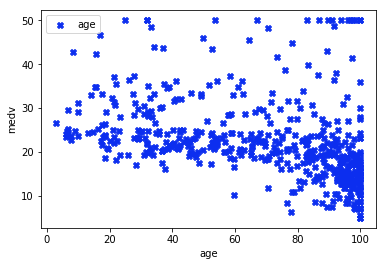

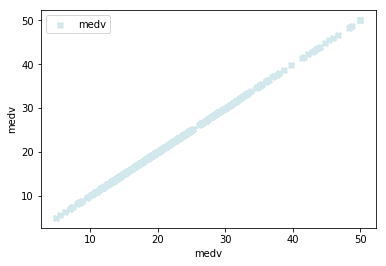

In [9]:
# Your code here 
for column in new_df:
    plt.scatter(data[column], data.medv, label=column, color = np.random.rand(3,), marker = 'X')
    plt.xlabel(column)
    plt.ylabel('medv')
    plt.legend()
    plt.show()

In [10]:
# Your observations here 

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

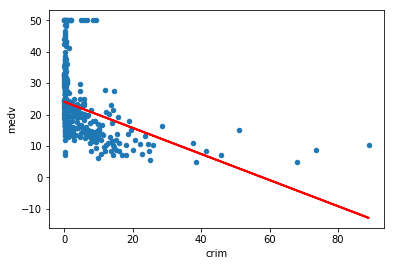

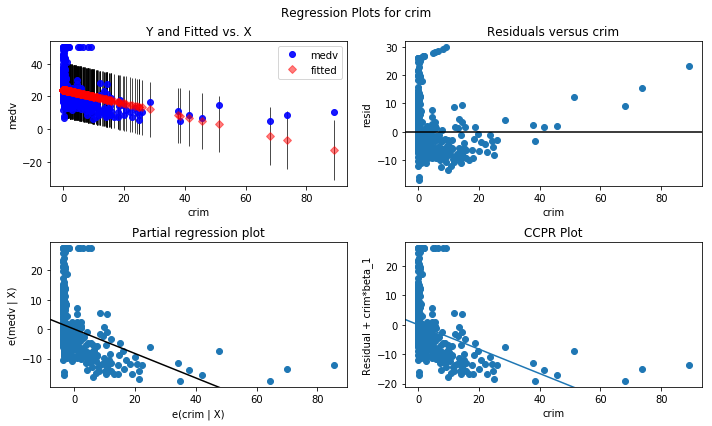

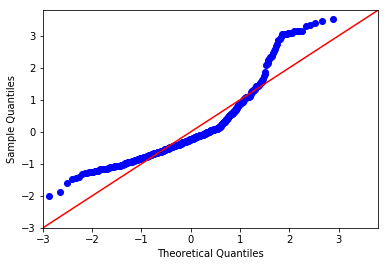

Intercept for crim is 24.033106174123866
Slope for crim is -0.41519027791509044


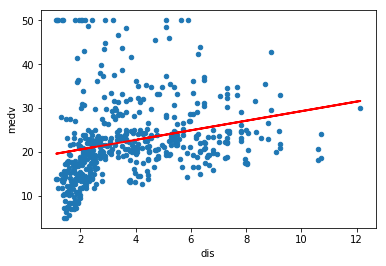

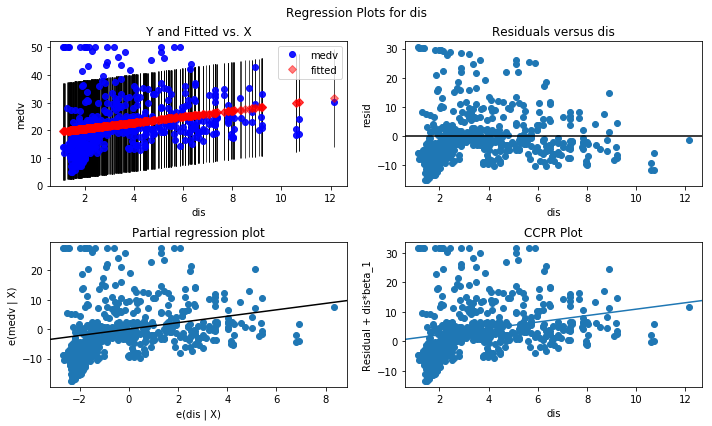

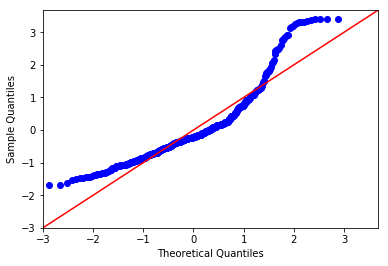

Intercept for dis is 18.39008833049339
Slope for dis is 1.0916130158411093


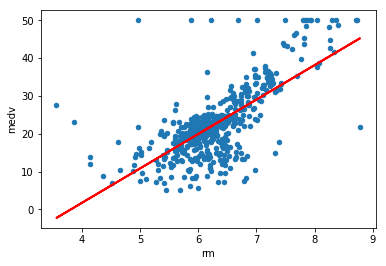

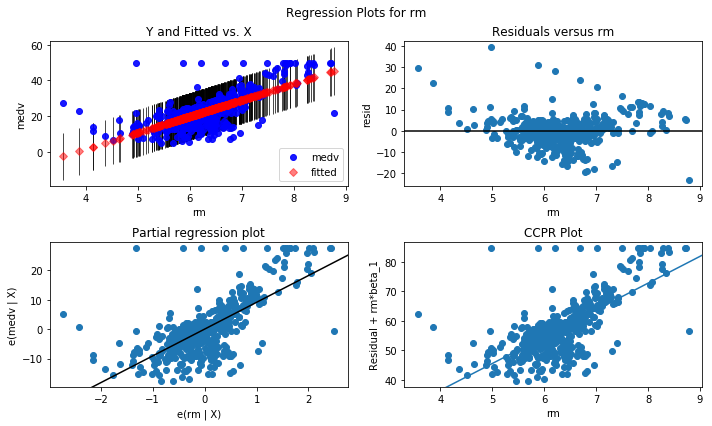

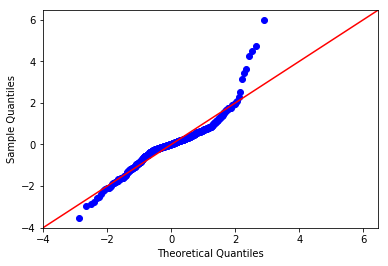

Intercept for rm is -34.670620776438575
Slope for rm is 9.102108981180312


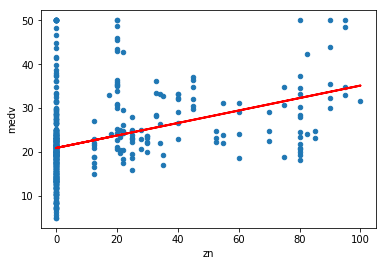

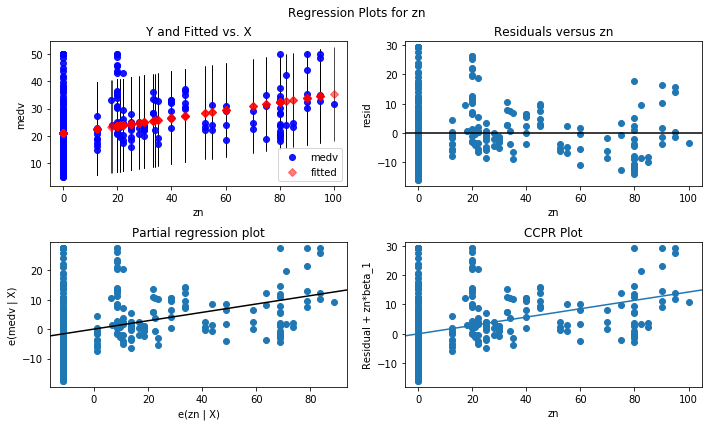

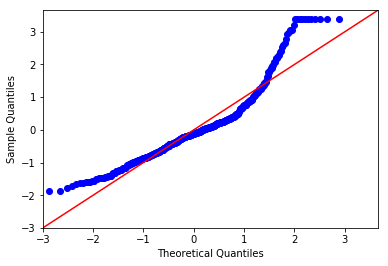

Intercept for zn is 20.917579117799825
Slope for zn is 0.14213999415535428


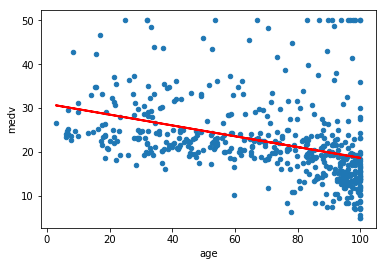

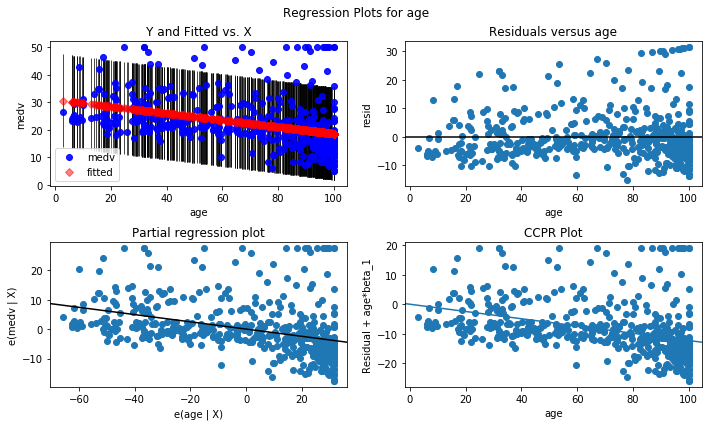

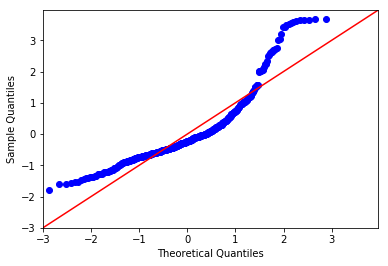

Intercept for age is 30.978677762618034
Slope for age is -0.12316272123567977


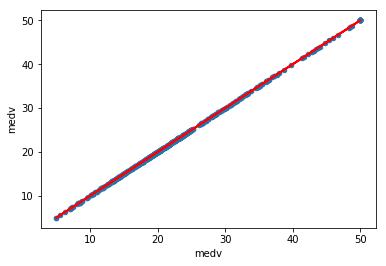

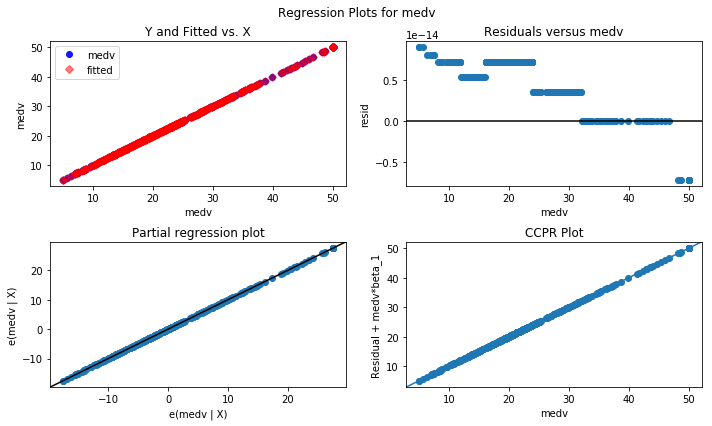

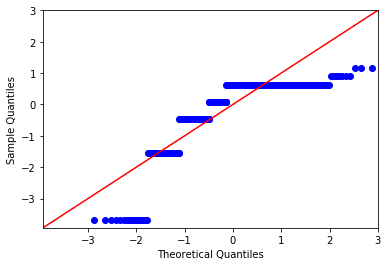

Intercept for medv is -9.547918011776346e-15
Slope for medv is 1.0000000000000002


In [22]:
result = {'ind_var':[], 'r_squared':[], 'intercept':[], 'slope':[], 'p_val':[], 'normality(JB)':[]}
import scipy.stats as stats
for index, value in enumerate(new_df):
    model = ols(formula = "medv~" + value, data = new_df).fit() 
    predicted = model.predict(data[value])
    data.plot(kind='scatter', x=value, y='medv');
    plt.plot(data[value], predicted, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(10,6))
    fig = sm.graphics.plot_regress_exog(model, value, fig=fig) 
    fig = sm.graphics.qqplot(model.resid, line='45', fit=True)
    plt.show()
    result['ind_var'].append(value)
    result['r_squared'].append(model.rsquared)
    result['intercept'].append(model.params[0])
    result['slope'].append(model.params[1])
    result['p_val'].append(model.pvalues[1])
    result['normality(JB)'].append(stats.jarque_bera(model.resid)[0])
    print(f'Intercept for {value} is {model.params[0]}')
    print(f'Slope for {value} is {model.params[1]}')
#     input('Press Enter to Continue ..')

In [13]:
# Your code here



In [23]:
pd.DataFrame(result)

,ind_var,r_squared,intercept,slope,p_val,normality(JB)
0,crim,0.150780,2.403311e+01,-0.415190,1.173987e-19,295.403720
1,dis,0.062464,1.839009e+01,1.091613,1.206612e-08,305.104165
2,rm,0.483525,-3.467062e+01,9.102109,2.487229e-74,612.448985
3,zn,0.129921,2.091758e+01,0.142140,5.713584e-17,262.387500
4,age,0.142095,3.097868e+01,-0.123163,1.569982e-18,456.983434
5,medv,1.000000,-9.547918e-15,1.000000,0.000000e+00,815.329119


In [118]:
#Your observations here 


Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

![](images/joke.png)

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.